### In this notebook I tried out most of the commonly available methods out there to detect number plates and most of hte methods are able to detct number plate only when the plate has rectangular orientation in the image.

#### 1. Youtube Nicholas : https://www.youtube.com/watch?v=NApYP_5wlKY&ab_channel=NicholasRenotte

In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

In [6]:
image_file = "images/Cars250.png"

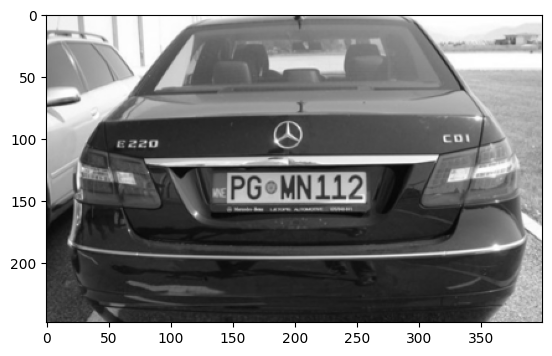

In [7]:
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

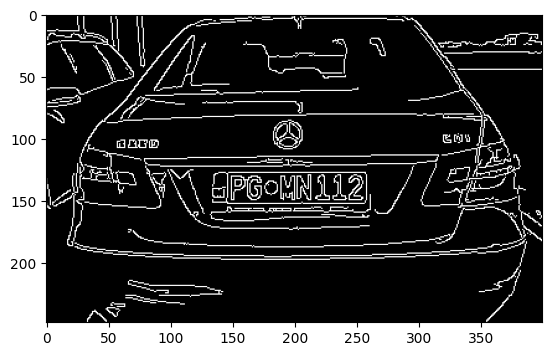

In [8]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [9]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

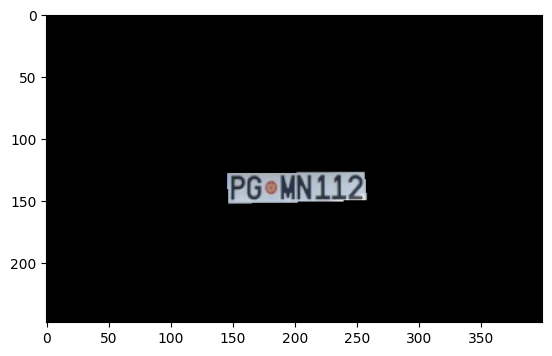

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

### This workds successfully for pictures that  have number plates in boxy rectungular format.

#### 2. Geeks For Geeks

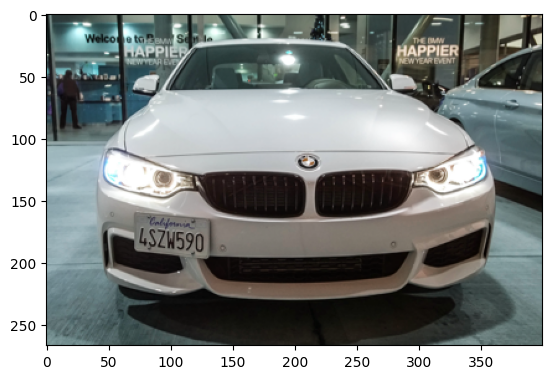

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

imagefile = "images/Cars179.png"
img = cv.imread(imagefile)

plt.imshow(img)

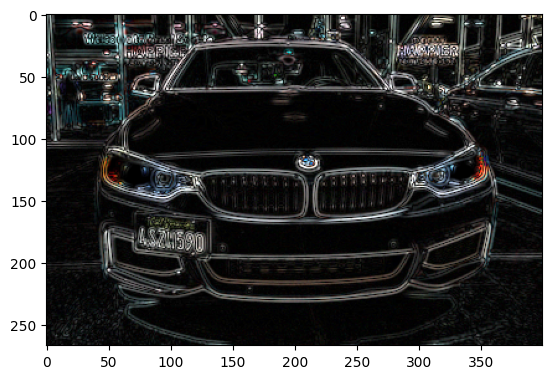

In [12]:
blur = cv.GaussianBlur(img,(3,3),0)

## vertical edge detection 
image_gray = cv2.cvtColor(blur, cv.COLOR_BGR2GRAY)

# 3x3 Y-direction  kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_y = cv2.filter2D(image_gray, -1, sobel_y)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(blur, ksize=3, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
plt.imshow(filtered_image)


In [107]:
def locate_license_plate_candidates(self, gray, keep=5):
# perform a blackhat morphological operation that will allow
# us to reveal dark regions (i.e., text) on light backgrounds
# (i.e., the license plate itself)
    rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)
    self.debug_imshow(blackhat)
    
    # next, find regions in the image that are light
    squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
    light = cv2.threshold(light, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    self.debug_imshow(light)
    
    gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
    dx=1, dy=0, ksize=-1)
    gradX = np.absolute(gradX)
    (minVal, maxVal) = (np.min(gradX), np.max(gradX))
    gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
    gradX = gradX.astype("uint8")
    self.debug_imshow( gradX)
    
    gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
    gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
    thresh = cv2.threshold(gradX, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    self.debug_imshow( thresh)
    
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    self.debug_imshow(thresh)
        
        
    thresh = cv2.bitwise_and(thresh, thresh, mask=light)
    thresh = cv2.dilate(thresh, None, iterations=2)
    thresh = cv2.erode(thresh, None, iterations=1)
    self.debug_imshow(thresh)
    
    
    
    
    
    




In [124]:
locate_license_plate_candidates(self ,image_gray)

NameError: name 'self' is not defined

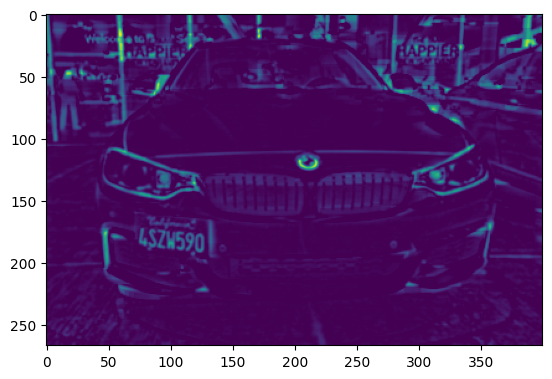

In [125]:
gray = image_gray

rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)
plt.imshow(blackhat)










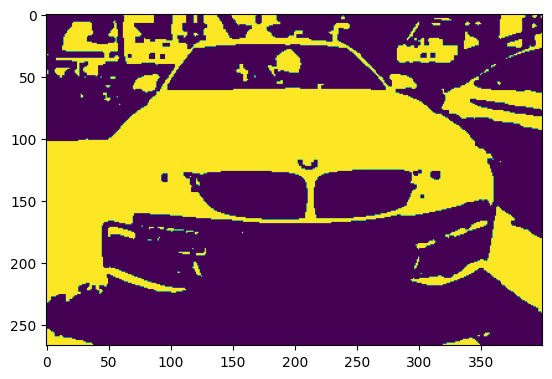

In [126]:
# next, find regions in the image that are light
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(light)

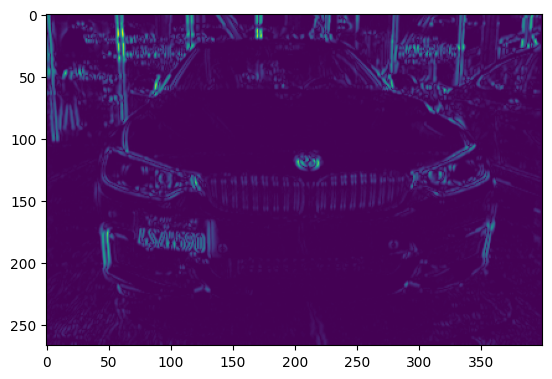

In [127]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
plt.imshow( gradX)

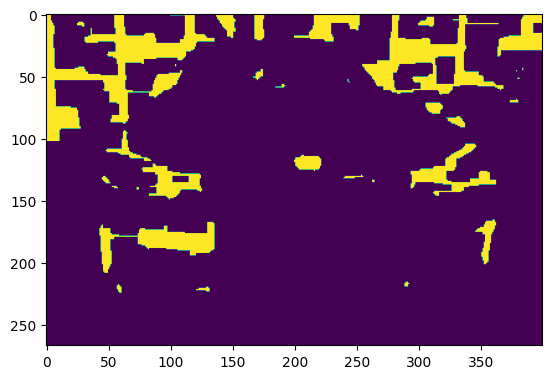

In [128]:

gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
thresh = cv2.threshold(gradX, 0, 255,
cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow( thresh)

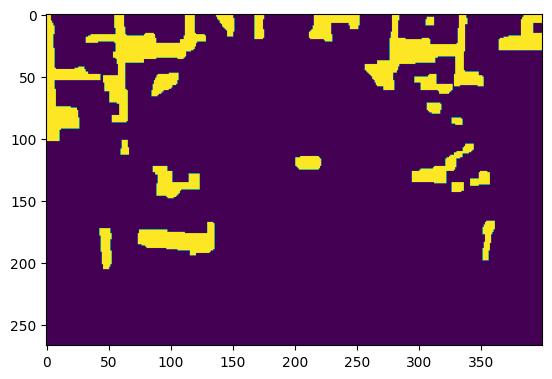

In [129]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(thresh)

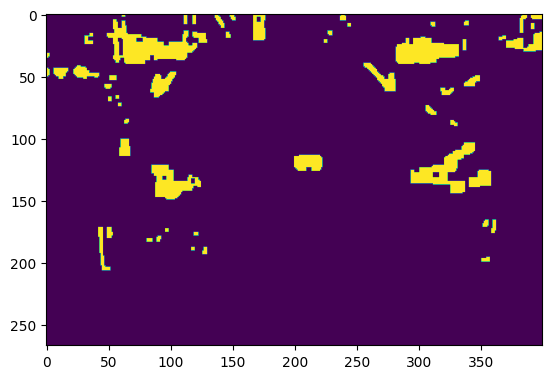

In [123]:

thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)
plt.imshow(thresh)
